In [57]:
import pandas as pd
import numpy as np

In [13]:
data = pd.read_csv('cleaned_data.csv', index_col=0)

In [14]:
data.head()

,song,year,artist,genre,lyrics,song_length
index,,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",1961.0
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",1270.0
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,827.0
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",2344.0
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",1540.0


In [25]:
lyrics_documents = list(data['lyrics'].dropna())

In [89]:
len(lyrics_documents)

237420

# Topic Analysis - Train Model

In [26]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

In [27]:
tokenizer = RegexpTokenizer(r'\w+')

In [28]:
en_stop = get_stop_words('en')

In [29]:
p_stemmer = PorterStemmer()

In [30]:
texts = []

In [31]:
for i in lyrics_documents:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

In [32]:
dictionary = corpora.Dictionary(texts)

In [33]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [34]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word = dictionary, passes=20)

In [35]:
print(ldamodel.print_topics(num_topics=2, num_words=4))

[(0, '0.025*"s" + 0.024*"t" + 0.015*"m" + 0.012*"can"'), (1, '0.021*"la" + 0.016*"de" + 0.015*"que" + 0.011*"da"')]


In [38]:
print(ldamodel.print_topics(num_topics=2, num_words=30))

[(0, '0.025*"s" + 0.024*"t" + 0.015*"m" + 0.012*"can" + 0.011*"love" + 0.010*"know" + 0.010*"don" + 0.010*"like" + 0.009*"just" + 0.009*"re" + 0.008*"get" + 0.008*"ll" + 0.007*"now" + 0.007*"oh" + 0.007*"go" + 0.007*"got" + 0.006*"time" + 0.006*"one" + 0.006*"come" + 0.006*"see" + 0.006*"want" + 0.005*"never" + 0.005*"make" + 0.005*"let" + 0.005*"ve" + 0.005*"say" + 0.005*"feel" + 0.005*"will" + 0.005*"take" + 0.005*"way"'), (1, '0.021*"la" + 0.016*"de" + 0.015*"que" + 0.011*"da" + 0.010*"ich" + 0.009*"y" + 0.009*"na" + 0.007*"ã" + 0.007*"tu" + 0.007*"und" + 0.007*"te" + 0.007*"en" + 0.006*"un" + 0.006*"mi" + 0.006*"es" + 0.006*"el" + 0.006*"die" + 0.006*"le" + 0.006*"du" + 0.006*"lo" + 0.005*"ì" + 0.005*"ë" + 0.005*"se" + 0.005*"o" + 0.004*"n" + 0.004*"yo" + 0.004*"der" + 0.004*"s" + 0.004*"nicht" + 0.004*"si"')]


In [37]:
ldamodel.save('lda.model')

In [48]:
print(ldamodel[corpus[0]])

[(0, 0.99792165)]


# Topic Analysis - Calculate Probabilities

In [90]:
analysis_data = data.dropna(subset=['lyrics'])

In [91]:
print(len(analysis_data['lyrics']))
print(len(texts))

237420
237420


In [92]:
topic_1 = []
topic_2 = []

In [93]:
for i in corpus:
    topic_1.append(ldamodel[i][0][0])
    topic_2.append(ldamodel[i][0][1])

In [94]:
analysis_data['p_topic_1'] = topic_1
analysis_data['p_topic_2'] = topic_2

/home/jtloong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/jtloong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [95]:
analysis_data.head()

,song,year,artist,genre,lyrics,song_length,p_topic_1,p_topic_2
index,,,,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",1961.0,0,0.997922
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",1270.0,0,0.996117
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,827.0,0,0.994600
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",2344.0,0,0.998031
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",1540.0,0,0.997335


# Visualize Probability Data by Genre

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

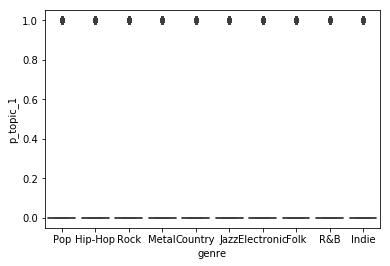

In [101]:
sns.boxplot(x='genre', y='p_topic_1', data=analysis_data)

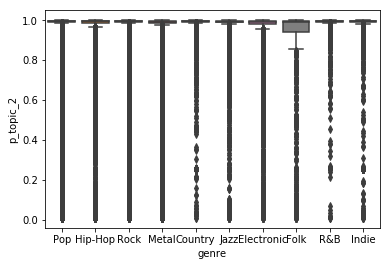

In [102]:
sns.boxplot(x='genre', y='p_topic_2', data=analysis_data)